In [1]:
import re
import os
import nltk
import string
from os import path 
import pandas as pd
from PIL import Image 
from nltk.util import ngrams 
from bs4 import BeautifulSoup
from nltk import word_tokenize 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
twts = pd.read_csv("trump_tweets.csv", encoding='ISO-8859-1')

# data taken from http://www.trumptwitterarchive.com/

the_path = 'C:/Users/louis/Google Drive/QMSS Courses/Natural Language Processing/Project/'

In [3]:
twts_2 = pd.read_csv("trump_large.txt", encoding = 'ISO-8859-1')
twts_2['text'].head()

0                                     DRAIN THE SWAMP!
1    Yesterday was a BIG day for Justice in the USA...
2    I will be interviewed on @foxandfriends at 8:0...
3      https://t.co/gQf2WFmQiC https://t.co/6ZqJ8AAlRc
4    RT @TeamTrump: President @realDonaldTrump: In ...
Name: text, dtype: object

In [4]:
twts.head()

,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,1,Twitter for iPhone,https://t.co/lZYGaD72Og,05-06-2020 20:41:23,14257,70521,False,1.258135e+18
1,2,Twitter for iPhone,RT @WhiteHouse: The partnership and collaborat...,05-06-2020 20:32:09,7864,0,True,1.258132e+18
2,3,Twitter for iPhone,RT @WhiteHouse: Just now President @realDonald...,05-06-2020 18:55:26,10765,0,True,1.258108e+18
3,4,Twitter for iPhone,The Fake News has reached an all time high!,05-06-2020 15:16:53,53928,288142,False,1.258053e+18
4,5,Twitter for iPhone,RT @Jim_Jordan: The Senate is back in session....,05-06-2020 14:30:45,16246,0,True,1.258042e+18


In [5]:
twts_3 = pd.read_csv("trump_noRT.txt", encoding = 'ISO-8859-1')
twts_3['text'].head()

0    On my way! #Inauguration2017 https://t.co/hOuM...
1    Great Concert at 4:00 P.M. today at Lincoln Me...
2    Join me at 4pm over at the Lincoln Memorial wi...
3    Thank you for joining us at the Lincoln Memori...
4    Thank you for a wonderful evening in Washingto...
Name: text, dtype: object

In [95]:
twts_only = twts_3['text']

In [7]:
# customize stopwords 

stop_words = set(stopwords.words('english'))
stop_words.add('e')


In [128]:
banned_words = ['RT', 'http', 'amp', 'Twitter', 'iPhone']

def process_text(text): 

    tmp_read = re.sub(r"http\S+", "", text) # remove websites 
    tmp_read = BeautifulSoup(str(tmp_read), "lxml").text # remove html things

    tmp_read = re.sub('[^a-zA-Z\']+', ' ', tmp_read) # remove punctuation, keep @ 
    tmp_read = re.sub(r'|'.join(map(re.escape, banned_words)), '', tmp_read) # remove some words
    tmp_read = str.lower(tmp_read)
    
    return tmp_read 

In [129]:
# twts_clean = twts_2['text'].apply(lambda x: (x))
twts_clean = twts_only.apply(lambda x: process_text(x))
twts_clean.head(100)

C:\Users\louis\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'....'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


0                               on my way inauguration 
1     great concert at p m today at lincoln memorial...
2     join me at pm over at the lincoln memorial wit...
3     thank you for joining us at the lincoln memori...
4     thank you for a wonderful evening in washingto...
                            ...                        
95    interesting that certain middle eastern countr...
96    the opinion of this so called judge which esse...
97    after being forced to apologize for its bad an...
98                            make america great again 
99    what is our country coming to when a judge can...
Name: text, Length: 100, dtype: object

In [10]:
# remove stopwords function

def remove_stopwords(text, stop_words_in):

    tmp = [word.lower() for word in text.split() if word not in stop_words_in]
    
    return tmp

In [11]:
# aply remove stopwords - apply & lambda needed for each line

twts_stpw = twts_clean.apply(lambda x: remove_stopwords(x, stop_words))
# twts_stpw

In [12]:
# stemmer function

stemmer = PorterStemmer()

def word_stemmer(text): 
    
    stem_text = " ".join([stemmer.stem(i) for i in text])
    
    return stem_text


In [13]:
# applying stemming 

twts_stemmed = twts_stpw.apply(lambda x: word_stemmer(x))
# twts_stemmed

In [14]:
# lematize function 

lemmatizer = WordNetLemmatizer() # Instantiate lemmatizer

def word_lemmatizer(text): 
    
    norm_text = []
    
    lem_text = [lemmatizer.lemmatize(word) for word in text]
    norm_text.append(lem_text)
    
    return norm_text

In [15]:
# applying lemmatize

twts_lemmatized = twts_stpw.apply(lambda x: word_lemmatizer(x))
twts_lemmatized

0                                    [[way, inauguration]]
1        [[great, concert, p, today, lincoln, memorial,...
2        [[join, pm, lincoln, memorial, family, inaugur...
3        [[thank, joining, u, lincoln, memorial, tonigh...
4        [[thank, wonderful, evening, washington, c, in...
                               ...                        
12341                                             [[true]]
12342    [[congratulation, officer, john, catanzara, el...
12343                               [[happy, mother, day]]
12344    [[biggest, political, crime, american, history...
12345                                 [[thank, eli, lake]]
Name: text, Length: 12346, dtype: object

In [16]:
# creating bigrams 

words = twts_stpw.apply(lambda x: nltk.word_tokenize(str(x)))
twts_bigrams = list(nltk.bigrams(words))


In [17]:
banned_words_2 = ['twitter iphone']
twts_bigrams = re.sub(r'|'.join(map(re.escape, banned_words_2)), '', str(twts_bigrams)) # remove some words

In [18]:
font = "BebasNeue.otf"

import numpy as np

# trump silhouette 
trump_path = the_path + "trump.png"
trump_head = Image.open(trump_path)
mask = Image.new("RGB", trump_head.size, (255, 255, 255))
mask.paste(trump_head, trump_head)
mask = np.array(mask)


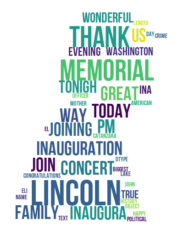

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
# ----------- WORDCLOUDS ------------------- # 

wordcloud = WordCloud(font_path = font,
                      background_color = "white", 
#                       max_font_size = 70,
#                       min_font_size = 4,
                      max_words = 4000,
                      mask = mask,
                      width= 2000,
                      prefer_horizontal = 1,
                      height = 1000).generate(str(twts_stpw))

# # # -------- BIGRAM VERSION ------------ #  
# wordcloud = WordCloud(font_path = font,
#                       background_color = "white", 
# #                       max_font_size = 100,
# #                       min_font_size = 20,
#                       prefer_horizontal = 1,
#                       max_words = 500,
#                       mask = mask,
#                       width= 4000, 
#                       height = 2000).generate(str(twts_bigrams))

# # -------- BIGRAM & LEMMATIZED VERSION ------------ #  
# wordcloud = WordCloud(font_path = font,
#                       background_color = "white", 
# #                       max_font_size = 100,
# #                       min_font_size = 20,
#                       prefer_horizontal = 1,
#                       max_words = 700,
#                       mask = mask,
#                       width= 4000, 
#                       height = 2000).generate(str(twts_lemmatized))


plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.figure(figsize = (20, 10))
plt.show()
plt.tight_layout(pad = 0.1)


In [20]:
# export as image 
# wordcloud.to_file("wordcloud_noRT_uni_2.png")

In [34]:
# -------- FLESCH READING EASE ------------ # 

import os
dire = os.getcwd()
listOfdir = os.listdir(dire)
while True:
   UserFileName = input('Enter file name:')
   if (UserFileName in listOfdir) and (UserFileName.endswith(".txt")):
      InputFile = open(UserFileName,'r')
      text = InputFile.read()
      sentence = text.count('.') + text.count('!') + text.count(';') + text.count(':') + text.count('?')
      words = len(text.split())
      syllable = 0
      for word in text.split():
         for vowel in ['a','e','i','o','u']:
            syllable += word.count(vowel)
         for ending in ['es','ed','e']:
            if word.endswith(ending):
               syllable -= 1
         if word.endswith('le'):
            syllable += 1
      G = round((0.39*words)/sentence+ (11.8*syllable)/words-15.59)
      if G >= 0 and G <= 30:
         print ('The Readability level is College')
      elif G >= 50 and G <= 60:
         print ('The Readability level is High School')
      elif G >= 90 and G <= 100:
         print ('The Readability level is fourth grade')
      print ('This text has %d words' %(words))
   elif UserFileName not in listOfdir:
      print ('This text file does not exist in current directory')
   elif not(UserFileName.endswith('.txt')):
      print ('This is not a text file.')  
        
# trump_noRT.txt

Enter file name:trump_noRT.txt
The Readability level is College
This text has 416722 words
Enter file name:trump_noRT.txt
The Readability level is College
This text has 416722 words
Enter file name:x


KeyboardInterrupt: 

In [85]:
# ----------- SENTIMENT ANALYSIS ------------- # 

# ----------- positive & negative only ------- # 
import seaborn as sns 

# Data Preprocessing and Feature Engineering
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [36]:
test_set = pd.read_csv("Test sets/test_tweets.csv", encoding = 'ISO-8859-1')
train_set = pd.read_csv("Test sets/train_tweets.csv", encoding = 'ISO-8859-1')

In [37]:
train_set.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [21]:
twts_3.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,On my way! #Inauguration2017 https://t.co/hOuM...,01-19-2017 20:13:57,8884,56474,False,822175285151928320
1,Twitter for Android,Great Concert at 4:00 P.M. today at Lincoln Me...,01-19-2017 20:18:32,8392,65389,False,822176438627536897
2,Twitter for iPhone,Join me at 4pm over at the Lincoln Memorial wi...,01-19-2017 20:21:36,12297,66188,False,822177206633955328
3,Twitter for iPhone,Thank you for joining us at the Lincoln Memori...,01-20-2017 00:40:51,34204,165943,False,822242449053614081
4,Twitter for iPhone,Thank you for a wonderful evening in Washingto...,01-20-2017 04:24:33,20770,112829,False,822298747421986828


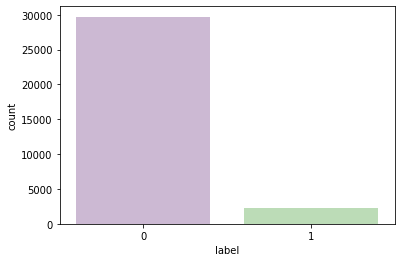

In [39]:
# label 0: Positive 
# label 1: Negative 

# Sets: https://raw.githubusercontent.com/MohamedAfham/Twitter-Sentiment-Analysis-Supervised-Learning/master/Data/train_tweets.csv
    
sns.countplot(x = 'label', data = train_set, palette = 'PRGn')

In [22]:
# ----------- several emotions sentiment analysis ----------- # 

train_data = pd.read_csv("Test sets/train_data.csv", encoding = 'ISO-8859-1') # from a Kaggle competition

In [117]:
train_data.head(50)

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
5,worry,Re-pinging @ghostridah14: why didn't you go to...
6,sadness,"I should be sleep, but im not! thinking about ..."
7,worry,Hmmm. http://www.djhero.com/ is down
8,sadness,@charviray Charlene my love. I miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?


In [24]:
train_data.sentiment.value_counts() # all types of sentiment in training dataset 

worry         7433
neutral       6340
sadness       4828
happiness     2986
love          2068
surprise      1613
hate          1187
fun           1088
relief        1021
empty          659
enthusiasm     522
boredom        157
anger           98
Name: sentiment, dtype: int64

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [53]:
# code from class 

my_vec = CountVectorizer(ngram_range = (1, 1))

my_xform_vec = my_vec.fit_transform(twts_clean).toarray()
col_names_twts = my_vec.get_feature_names()

my_xform_vec = pd.DataFrame(my_xform_vec, columns = col_names_twts)

In [55]:
my_xform_vec

,aaa,abaco,abandon,abandoned,abbas,abbott,abc,abcnews,abcpolitics,abcworldnews,...,zone,zones,zoning,zoo,zoom,zte,ztpetrizzo,zucker,zuckerberg,zuker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
col_names_twts

['aaa',
 'abaco',
 'abandon',
 'abandoned',
 'abbas',
 'abbott',
 'abc',
 'abcnews',
 'abcpolitics',
 'abcworldnews',
 'abdo',
 'abducted',
 'abdul',
 'abdullah',
 'abe',
 'abedin',
 'abeshinzo',
 'abiding',
 'ability',
 'abiy',
 'abject',
 'able',
 'abo',
 'aboard',
 'abolish',
 'abolishing',
 'abortion',
 'abound',
 'about',
 'above',
 'abraham',
 'abrams',
 'abramson',
 'abroad',
 'abrupt',
 'abruptly',
 'absentee',
 'absolute',
 'absolutely',
 'absurd',
 'abu',
 'abundance',
 'abuse',
 'abused',
 'abuser',
 'abuses',
 'abusing',
 'abusive',
 'abuts',
 'abuzz',
 'abysmal',
 'ac',
 'academia',
 'academy',
 'accelerate',
 'accelerated',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accident',
 'accidentally',
 'accidents',
 'accommodations',
 'accompanie',
 'accompanied',
 'accomplish',
 'accomplished',
 'accomplishing',
 'accomplishment',
 'accomplishments',
 'accord',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accountabi

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from sklearn.model_selection import GridSearchCV
import sys

In [120]:
train_text = train_data['content'].apply(lambda x: process_text(x))

In [119]:
train_text.head(7)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [130]:
train_clean = train_data
train_clean['content'] = train_data['content'].apply(lambda x: process_text(x))

In [131]:
train_clean.head()

,sentiment,content
0,empty,tiffanylue i know i was listenin to bad habit...
1,sadness,layin n bed with a headache ughhhh waitin on y...
2,sadness,funeral ceremony gloomy friday
3,enthusiasm,wants to hang out with friends soon
4,neutral,dannycastillo we want to trade with someone w...


In [133]:
train_text = np.array(train_clean['content'])
print(train_text)

[' tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part '
 'layin n bed with a headache ughhhh waitin on your call '
 'funeral ceremony gloomy friday ' ...
 ' fureousangel that is comedy good luck my friend '
 'stephs grad party gr shoved cake in her face watchd sis bitch slap a boy ate good food satisfied'
 ' jesfive sweeeeet san fran is awesome love it there']


In [134]:
my_vec_tfidf_out = TfidfVectorizer()
my_xform_tfidf_out = my_vec_tfidf_out.fit_transform(train_text)
my_pd = pd.DataFrame(my_xform_tfidf_out.toarray())
my_pd.columns = my_vec_tfidf_out.get_feature_names()


In [135]:
my_pd.head()

,aa,aaa,aaaa,aaaaa,aaaaaaaa,aaaaaaaaaaa,aaaaaaaaaahhhhhhhh,aaaaaaaaaamazing,aaaaaaaafternoon,aaaaaaaahhhhhhhh,...,zyrtec,zzerbe,zzwhitejd,zzybug,zzz,zzzz,zzzzy,zzzzz,zzzzzzz,zzzzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
my_xform_tfidf_out

<30000x35872 sparse matrix of type '<class 'numpy.float64'>'
	with 352824 stored elements in Compressed Sparse Row format>

In [137]:
col_names_train = my_pd.columns
print(col_names_train)

Index(['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaa', 'aaaaaaaaaaa',
       'aaaaaaaaaahhhhhhhh', 'aaaaaaaaaamazing', 'aaaaaaaafternoon',
       'aaaaaaaahhhhhhhh',
       ...
       'zyrtec', 'zzerbe', 'zzwhitejd', 'zzybug', 'zzz', 'zzzz', 'zzzzy',
       'zzzzz', 'zzzzzzz', 'zzzzzzzzzzzzzzz'],
      dtype='object', length=35872)


In [138]:
my_xform_tfidf_df = pd.DataFrame(my_pd, columns = col_names_train)

In [139]:
my_xform_tfidf_df

,aa,aaa,aaaa,aaaaa,aaaaaaaa,aaaaaaaaaaa,aaaaaaaaaahhhhhhhh,aaaaaaaaaamazing,aaaaaaaafternoon,aaaaaaaahhhhhhhh,...,zyrtec,zzerbe,zzwhitejd,zzybug,zzz,zzzz,zzzzy,zzzzz,zzzzzzz,zzzzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
from sklearn.decomposition import PCA

def iterate_var(var_target):
    var_fig = 0.0
    cnt = 1
    while var_fig <= var_target:
        pca = PCA(n_components = cnt)
        my_dim = pca.fit_transform(my_xform_tfidf)
        var_fig = sum(pca.explained_variance_ratio_)   
        cnt += 1
    return my_dim, pca

In [141]:
def grid_search_func(param_grid, the_mode_in, the_vec_in, the_lab_in):
    grid_search = GridSearchCV(the_mode_in, param_grid=param_grid, cv=5)
    best_model = grid_search.fit(the_vec_in, the_lab_in)
    max_score = grid_search.best_score_
    best_params = grid_search.best_params_

    return best_model, max_score, best_params

param_grid = {"max_depth": [10, 50, 100],
              "n_estimators": [1, 4, 16, 32, 64]}

In [83]:
# TAKES FOREVER TO LOAD # 
clf_pca = RandomForestClassifier()
gridsearch_model, best, opt_params = grid_search_func(
        param_grid, clf_pca, my_xform_tfidf_df, train_data.sentiment)

KeyboardInterrupt: 

In [ ]:
clf_pca = RandomForestClassifier(random_state=10)
clf_pca.set_params(**gridsearch_model.best_params_)
clf_pca.fit(my_dim, train_data.sentiment)

## HERE ## 

In [142]:
# ------------ NAIVE BAYES CLASSIFIFER ---------------- #

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(ngram_range = (1, 1))),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data['content'], train_data['sentiment'], test_size=0.8)
pipeline.fit(X_train, Y_train)
predictions = pipeline.predict(Y_test)

print(classification_report(predictions, Y_test))
print(confusion_matrix(predictions, Y_test))
print(accuracy_score(predictions, Y_test))

C:\Users\louis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         0
     boredom       0.00      0.00      0.00         0
       empty       0.00      0.00      0.00         0
  enthusiasm       0.00      0.00      0.00         0
         fun       0.00      0.00      0.00         0
   happiness       0.00      0.00      0.00       881
        hate       0.00      0.00      0.00         0
        love       1.00      1.00      1.00      1648
     neutral       0.00      0.00      0.00      1284
      relief       0.00      0.00      0.00         0
     sadness       1.00      0.54      0.70      7178
    surprise       0.00      0.00      0.00         0
       worry       1.00      0.46      0.63     13009

    accuracy                           0.48     24000
   macro avg       0.23      0.15      0.18     24000
weighted avg       0.91      0.48      0.62     24000

[[   0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0

In [151]:
msg_train, twts_stpw, label_train, twts_stpw = train_test_split(train_text, train_data['sentiment'], test_size=0.8)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(twts_stpw)

print(classification_report(predictions, Y_test))
print(confusion_matrix(predictions, Y_test))
print(accuracy_score(predictions, Y_test))

ValueError: Found input variables with inconsistent numbers of samples: [24000, 27000]

In [153]:
# GridSearch to maximize Recall 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


X = train_clean['content']  # Features
y = train_clean['sentiment']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, Y_train)


C:\Users\louis\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [21000, 6000]

In [ ]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(msg_test)

In [ ]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)


In [183]:
train_data.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [175]:
# def buildVocabulary(preprocessedTrainingData):
#     all_words = []
    
#     for (words, sentiment) in preprocessedTrainingData:
#         all_words.extend(words)

#     wordlist = nltk.FreqDist(all_words)
#     word_features = wordlist.keys()
    
#     return word_features

In [171]:
# # matching tweets against our vocab 

# def extract_features(tweet): 
#     tweet_words = set(tweet)
#     features = {}
#     for word in word_features:
#         features['contains(%s)' % word] = (word in tweet_words)
    
#     return features

In [ ]:
# # building our feature vector 

# word_features = buildVocabulary(train_data)